In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble, tree, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error , mean_absolute_error, confusion_matrix,roc_curve,precision_recall_curve
from sklearn.utils import shuffle
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Read csv files

import os
for dirname, _, filenames in os.walk('Source'):
    for filename in filenames:
        print(dirname + "/" + filename)

Source/heart.csv


In [3]:
#Read_Csv file
training=pd.read_csv("Source/heart.csv")
#View data info, describe and head
#No null values.
#All values are either int or float
training_info=training.info()
training_describe=training.describe()
training_head=training.head()
print(training_info)
print(training_describe)
print(training_head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.62376

In [4]:
#Arrange variables in categorical vs continuous
training_continuous_list=["age","trestbps","chol","thalach","oldpeak"]
training_categorical_list=["sex","cp","fbs","restecg","exang","slope","ca","thal","target"]

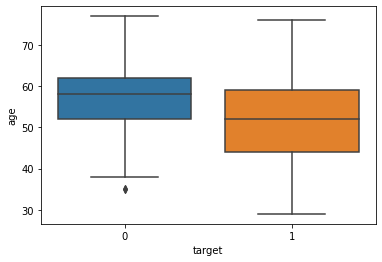

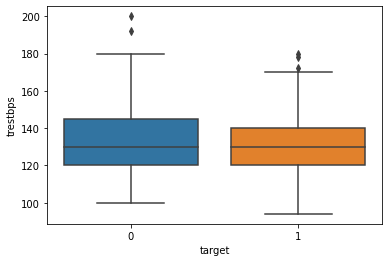

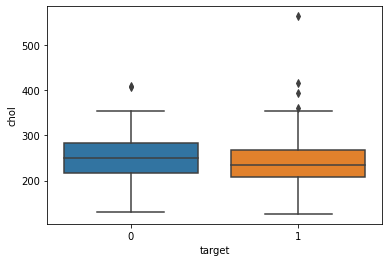

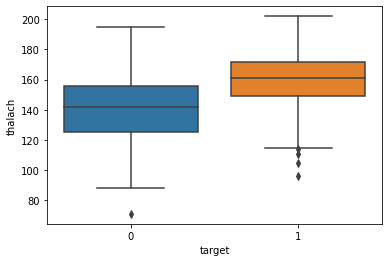

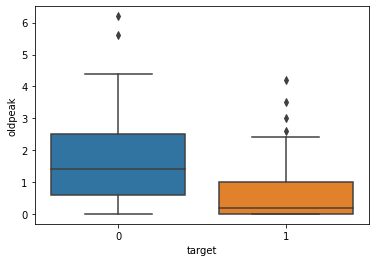

In [5]:
#Inspect Target vs continuous variables
for cc in training_continuous_list:
    sns.boxplot(data=training,x="target",y=cc)
    plt.show()

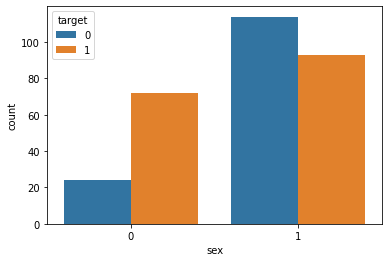

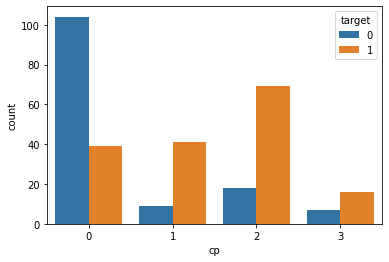

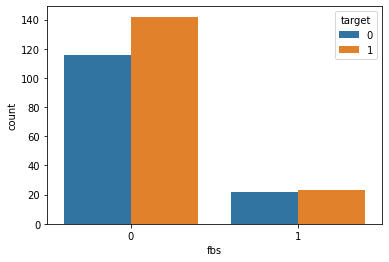

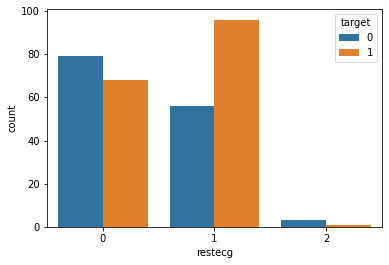

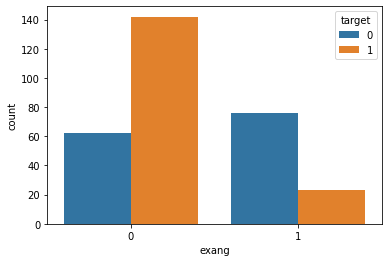

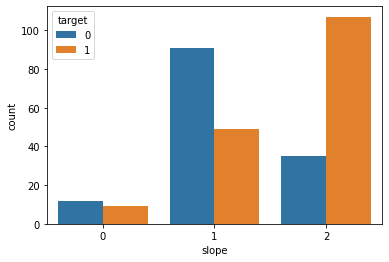

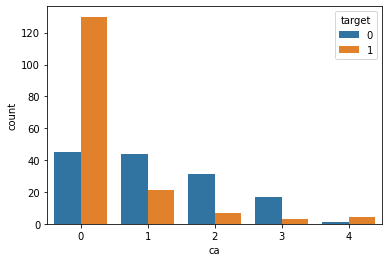

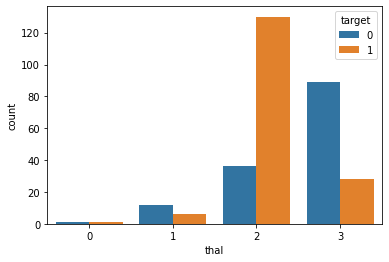

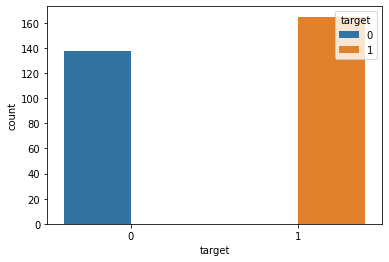

In [6]:
#Inspect Target vs categorical variables
for cc in training_categorical_list:
    sns.countplot(data=training,x=cc,hue="target")
    plt.show()

     age  trestbps  chol  thalach  oldpeak  sex_0  sex_1  cp_0  cp_1  cp_2  \
0     63       145   233      150      2.3      0      1     0     0     0   
1     37       130   250      187      3.5      0      1     0     0     1   
2     41       130   204      172      1.4      1      0     0     1     0   
3     56       120   236      178      0.8      0      1     0     1     0   
4     57       120   354      163      0.6      1      0     1     0     0   
..   ...       ...   ...      ...      ...    ...    ...   ...   ...   ...   
298   57       140   241      123      0.2      1      0     1     0     0   
299   45       110   264      132      1.2      0      1     0     0     0   
300   68       144   193      141      3.4      0      1     1     0     0   
301   57       130   131      115      1.2      0      1     1     0     0   
302   57       130   236      174      0.0      1      0     0     1     0   

     ...  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1  thal_2  thal_

<AxesSubplot:>

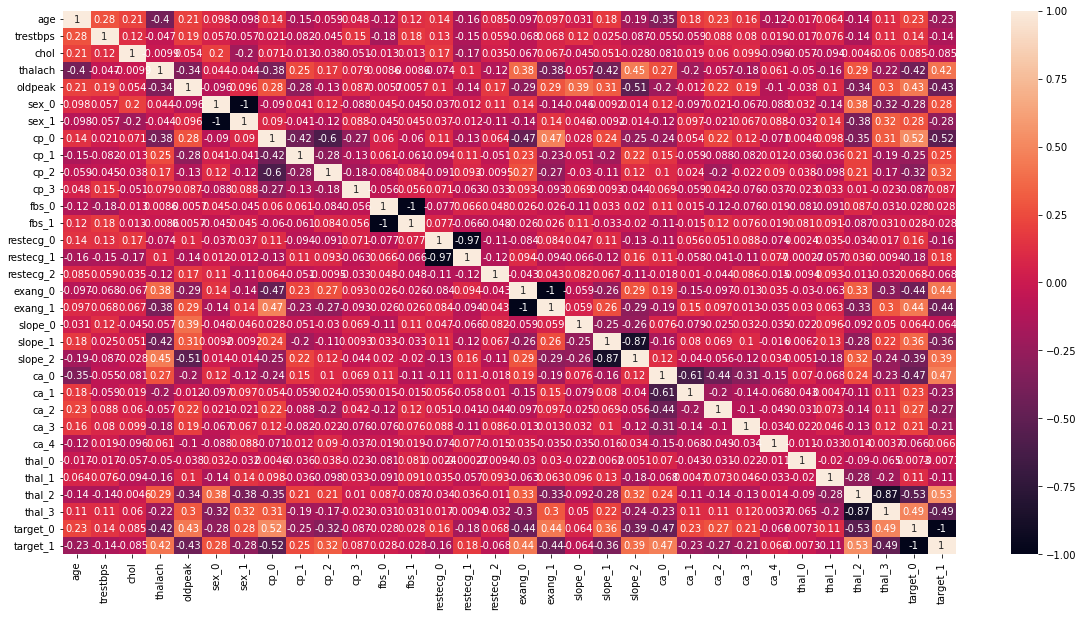

In [7]:
#Turn training into get_dummies
training[training_categorical_list]=training[training_categorical_list].astype(str)
training_gd=pd.get_dummies(training)
print(training_gd)
#Heatmap for all variables
plt.figure(figsize=(20,10))
training_gd_corr=training_gd.corr()
print(training_gd_corr)
sns.heatmap(training_gd_corr,annot=True)

In [8]:
#Identify variables that are highly correlated with target
training_gd_corr_highcorr=training_gd_corr["target_1"]
#Use 10 variables with highest correlation
training_gd_corr_highcorr_abs=abs(training_gd_corr_highcorr).sort_values()
training_gd_corr_highcorr_abs_list=training_gd_corr_highcorr_abs.index.tolist()[-12:-2]
print(training_gd_corr_highcorr_abs_list)

['slope_1', 'slope_2', 'thalach', 'oldpeak', 'exang_0', 'exang_1', 'ca_0', 'thal_3', 'cp_0', 'thal_2']


In [9]:
#Modify list to remove dummies
new_training_list=[]
for x in training_gd_corr_highcorr_abs_list:
    variable=x.split("_",1)[0]
    if variable not in new_training_list:
        new_training_list.append(variable)
print(new_training_list)    

['slope', 'thalach', 'oldpeak', 'exang', 'ca', 'thal', 'cp']


In [10]:
#Creating a DataFrame from only highly correlated variables
X_train=training[new_training_list]
Y_train=training["target"]

In [11]:
#Classification Modelling Using LogisticRegression and CV
lr=LogisticRegression(max_iter=200)
lr_cv=cross_val_score(lr,X_train,Y_train,cv=5)
print(lr_cv)
print(lr_cv.mean())

#Parameters setting
parameters_lr_gcv={"penalty":["l1","l2","elasticnet","none"],"C":np.logspace(0,1000,7)}
lr_gcv=GridSearchCV(lr,parameters_lr_gc)
lr_gcv.fit(X_train,Y_train)
print(lr_gcv.best_params_)
print(lr_gcv.best_score_)

[0.86885246 0.8852459  0.85245902 0.9        0.73333333]
0.8479781420765027
{'C': 1.0, 'penalty': 'l2'}
0.8479781420765027


In [12]:
#Classification Modelling Using RandomForestClassifier and CV
rfc=RandomForestClassifier()
rfc_cv=cross_val_score(rfc,X_train,Y_train,cv=5)
print(rfc_cv)
print(rfc_cv.mean())

#Parameters setting
parameters_rfc_gcv={"criterion":["gini","entropy"],"max_features":["auto","sqrt","log2"]}
rfc_gcv=GridSearchCV(rfc,parameters_rfc_gcv)
rfc_gcv.fit(X_train,Y_train)
print(rfc_gcv.best_params_)
print(rfc_gcv.best_score_)

[0.7704918  0.86885246 0.81967213 0.78333333 0.78333333]
0.8051366120218579
{'criterion': 'entropy', 'max_features': 'log2'}
0.8183606557377049


In [13]:
#Classification Modelling Using KNeighborsClassifier and CV
knn=KNeighborsClassifier()
knn_cv=cross_val_score(knn,X_train,Y_train,cv=5)
print(knn_cv)
print(knn_cv.mean())

#Parameters setting
parameters_knn_gcv={"n_neighbors":[1,2,3,4,5],"weights":["uniform","distance"],\
                    "algorithm":["auto","ball_tree","kd_tree","brute"]}
knn_gcv=GridSearchCV(knn,parameters_knn_gcv)
knn_gcv.fit(X_train,Y_train)
print(knn_gcv.best_params_)
print(knn_gcv.best_score_)

[0.73770492 0.7704918  0.80327869 0.83333333 0.71666667]
0.7722950819672131
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
0.7722950819672131


In [14]:
#Classification Modelling Using GaussianNB and CV
gnb=GaussianNB()
gnb_cv=cross_val_score(gnb,X_train,Y_train,cv=5)
print(gnb_cv)
print(gnb_cv.mean())

#Parameters setting
parameters_gnb_gcv={'var_smoothing': np.logspace(0,-9, num=100)}
gnb_gcv=GridSearchCV(gnb,parameters_gnb_gcv)
gnb_gcv.fit(X_train,Y_train)
print(gnb_gcv.best_params_)
print(gnb_gcv.best_score_)

[0.80327869 0.8852459  0.80327869 0.83333333 0.73333333]
0.8116939890710382
{'var_smoothing': 0.0002310129700083158}
0.8281420765027322


In [15]:
#Compare different algorithms and hypertuning
data={"Algo":["LogisticRegression","RandomForestClassifier","KNeighborsClassifier","GaussisanNB"],\
      "Results":[lr_cv.mean(),rfc_cv.mean(),knn_cv.mean(),gnb_cv.mean()],\
      "Hypertuned Results":[lr_gcv.best_score_,rfc_gcv.best_score_,knn_gcv.best_score_,gnb_gcv.best_score_],\
      "Params":[lr_gcv.best_params_,rfc_gcv.best_params_,knn_gcv.best_params_,gnb_gcv.best_params_]}
Results_Table=pd.DataFrame(data=data)
print(Results_Table)

                     Algo   Results  Hypertuned Results  \
0      LogisticRegression  0.847978            0.847978   
1  RandomForestClassifier  0.805137            0.818361   
2    KNeighborsClassifier  0.772295            0.772295   
3             GaussisanNB  0.811694            0.828142   

                                              Params  
0                        {'C': 1.0, 'penalty': 'l2'}  
1   {'criterion': 'entropy', 'max_features': 'log2'}  
2  {'algorithm': 'auto', 'n_neighbors': 5, 'weigh...  
3           {'var_smoothing': 0.0002310129700083158}  


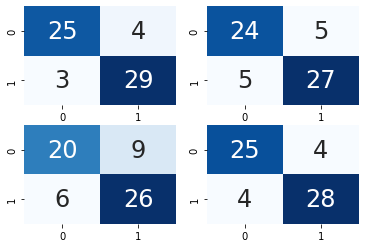

In [16]:
#Create Train Test Split for confusion matrix
X_cmTrain,X_cmTest,Y_cmTrain,Y_cmTest=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

#Create hypertuned models
lr_tuned=LogisticRegression(C=1,penalty="l2")
rfc_tuned=RandomForestClassifier(criterion="entropy",max_features="auto")
knn_tuned=KNeighborsClassifier(algorithm="auto",n_neighbors=5,weights="uniform")
gnb_tuned=GaussianNB(var_smoothing=0.0002310129)
lr_tuned.fit(X_cmTrain,Y_cmTrain)
rfc_tuned.fit(X_cmTrain,Y_cmTrain)
knn_tuned.fit(X_cmTrain,Y_cmTrain)
gnb_tuned.fit(X_cmTrain,Y_cmTrain)

#Predicting hypertuned results
Y_predict_lr=lr_tuned.predict(X_cmTest)
Y_predict_rfc=rfc_tuned.predict(X_cmTest)
Y_predict_knn=knn_tuned.predict(X_cmTest)
Y_predict_gnb=gnb_tuned.predict(X_cmTest)

#Create Confusion Matrix
cm_lr=confusion_matrix(Y_cmTest,Y_predict_lr)
cm_rfc=confusion_matrix(Y_cmTest,Y_predict_rfc)
cm_knn=confusion_matrix(Y_cmTest,Y_predict_knn)
cm_gnb=confusion_matrix(Y_cmTest,Y_predict_gnb)

#Plot Confusion Matrix
plt.subplot(2,2,1)
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.subplot(2,2,2)
sns.heatmap(cm_rfc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.subplot(2,2,3)
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.subplot(2,2,4)
sns.heatmap(cm_gnb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.show()

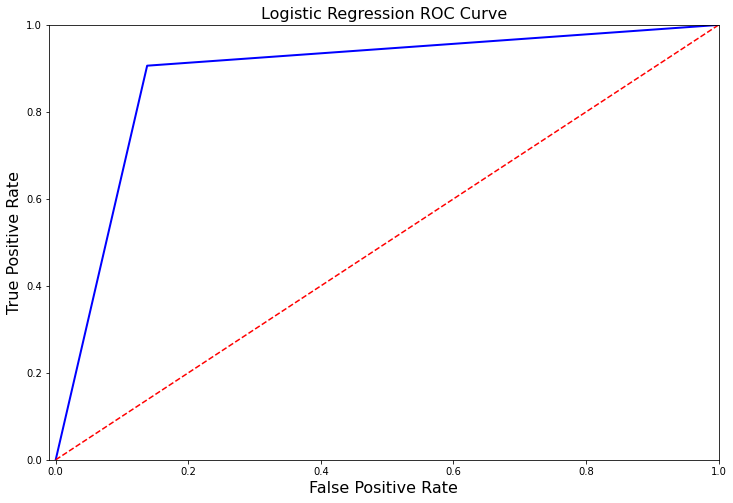

In [17]:
#Deep dive into Logistic Regression
#ROC Curve
log_fpr,log_tpr,log_threshold=roc_curve(Y_cmTest.values.astype(int),Y_predict_lr.astype(int))
plt.figure(figsize=(12,8))
plt.title('Logistic Regression ROC Curve', fontsize=16)
plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.axis([-0.01,1,0,1])
plt.show()

(0.0, 1.0)

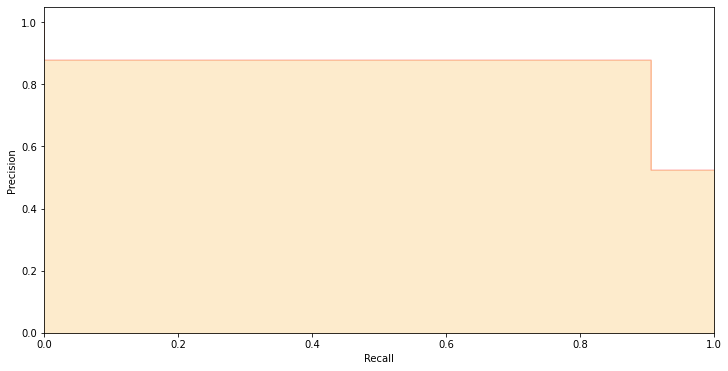

In [18]:
#Precision Recall Curve
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(Y_cmTest.values.astype(int),Y_predict_lr.astype(int))

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])